In [1]:
import sys
sys.path.append('../')

from g_ml.utilidades.metricas import MSE
from g_ml.utilidades.metricas import MRE

from g_ml.utilidades.processamento import treino_teste
from g_ml.utilidades.processamento import escala_min_max

from g_ml.algoritmos.regressao import OLS
from g_ml.algoritmos.regressao import RegressaoGD
from g_ml.algoritmos.regressao import SGD
from g_ml.algoritmos.regressao import RegressaoPolinomial

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Aplicação da Regressão linear analítica (OLS)

In [2]:
# Dados artificiais em uma dimensão
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy().reshape(-1,1)

In [3]:
ols = OLS()

In [4]:
ols.fit(X, y)

In [5]:
ols.w

array([[0.06761792],
       [1.57486517]])

In [6]:
y_pred = ols.predict(X)

In [7]:
# Métricas
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(rmse))
print("O erro relativo médio absoluto é: {}".format(mre))


A raiz do erro quadrático médio é: 0.461953354062258
O erro relativo médio absoluto é: 0.5865122801771744


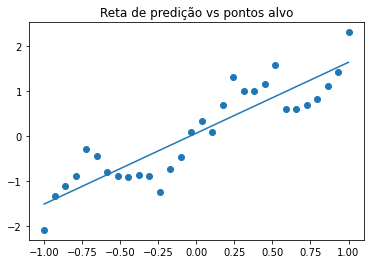

In [8]:
# Plotando o resultado
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = ols.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

Claramente precisamos de um modelo não linear

# Algoritmo Gradiente Descendente (GD)

In [9]:
# Carregamento dos Dados
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

In [10]:
gd = RegressaoGD()

In [11]:
gd.fit(X,y)

In [12]:
gd.w

array([0.06763117, 1.55728432])

In [13]:
y_pred = gd.predict(X)

In [14]:
# Métricas
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(rmse))
print("O erro relativo médio absoluto é: {}".format(mre))

A raiz do erro quadrático médio é: 0.4620725437840109
O erro relativo médio absoluto é: 0.5814087448129349


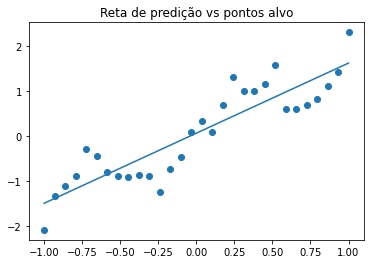

In [15]:
#Plotando
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = gd.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

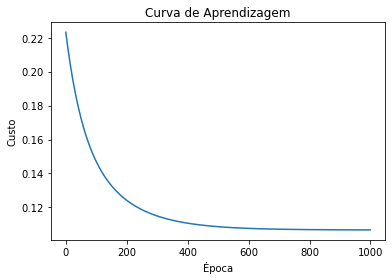

In [16]:
plt.plot(gd.custos)
plt.xlabel('Época')
plt.ylabel('Custo')
plt.title('Curva de Aprendizagem')
plt.show()

# Algoritmo Gradiente Descendente Estocástico (SGD/LMS)

In [17]:
# Carregamento dos dados
df = pd.read_csv('../data/artificial1d.csv', names = ['x','y'])
X = df['x'].to_numpy().reshape(-1,1)
y = df['y'].to_numpy()

In [18]:
sgd = SGD()
sgd.fit(X,y)
sgd.w

array([0.06897937, 1.57545885])

In [19]:
y_pred = sgd.predict(X)

In [20]:
# Métricas
mse = MSE(y, y_pred)
mre = MRE(y, y_pred)
rmse = np.sqrt(mse)

print("A raiz do erro quadrático médio é: {}".format(rmse))
print("O erro relativo médio absoluto é: {}".format(mre))

A raiz do erro quadrático médio é: 0.4619554961835902
O erro relativo médio absoluto é: 0.586605688009825


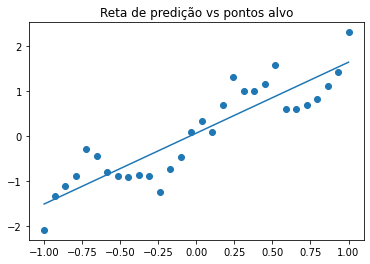

In [21]:
# Plotando reta resultante
X_plot = np.linspace(X.max(), X.min(), 1000)
y_plot = sgd.predict(X_plot)

plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.title("Reta de predição vs pontos alvo")
plt.show()

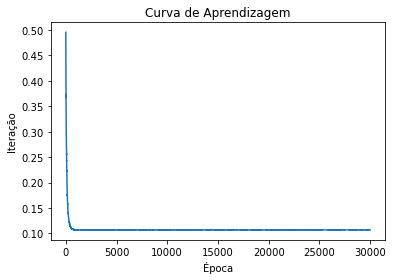

In [22]:
# Plotando cada iteração
plt.plot(sgd.custos)
plt.xlabel('Época')
plt.ylabel('Iteração')
plt.title('Curva de Aprendizagem')
plt.show()

# Regressão Polinomial

**Sem regularização**

In [23]:
# Carregamento dos dados
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)


In [24]:
# Separação em treino e teste
X_treino, X_teste, y_treino, y_teste = treino_teste(X, y, tamanho_teste = 0.2)

In [25]:
#Escalando os dados entre 0 e 1
escalador_X_01 = escala_min_max()
escalador_y_01 = escala_min_max()

escalador_X_01.fit(X_treino)
escalador_y_01.fit(y_treino)

X_treino_01 = escalador_X_01.transform(X_treino)
X_teste_01 = escalador_X_01.transform(X_teste)
y_treino_01 =  escalador_y_01.transform(y_treino)
y_teste_01 =  escalador_y_01.transform(y_teste)


In [26]:
#Teste
gd = RegressaoGD()
gd.fit(X_treino_01,y_treino_01)
y_chapeu = gd.predict(X_teste_01)
y_chapeu = escalador_y_01.inversa(y_chapeu)
print(np.sqrt(MSE(y_chapeu,y_teste)))

from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_chapeu,y_teste)))

8.802228535855516
8.802228535855516


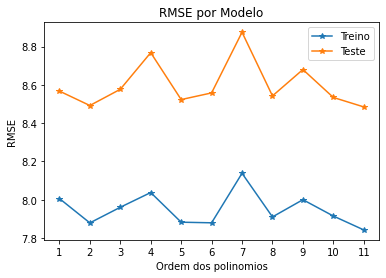

In [27]:
#listas com histórico dos erros
rmse_treino = []
mre_treino = []
rmse_teste = []
mre_teste = []

for i in range(1,12):
    polinomial = RegressaoPolinomial(t = 2000 ,taxa = 0.1 ,ordem = i)
    polinomial.fit(X_treino_01, y_treino_01)

    y_pred_teste_01 = polinomial.predict(X_teste_01)
    y_pred_treino_01 = polinomial.predict(X_treino_01)

    y_pred_teste = escalador_y_01.inversa(y_pred_teste_01)
    y_pred_treino = escalador_y_01.inversa(y_pred_treino_01)
    
    rmse_treino.append(np.sqrt(MSE(y_pred_treino, y_treino)))
    mre_treino.append(MRE(y_pred_treino, y_treino))
    
    rmse_teste.append(np.sqrt(MSE(y_pred_teste, y_teste)))
    mre_teste.append(MRE(y_pred_teste, y_teste))  

plt.plot(rmse_treino,label='Treino', marker = '*')
plt.plot(rmse_teste,label='Teste', marker = '*')
plt.xlabel('Ordem dos polinomios')
plt.ylabel('RMSE')
ticks = np.arange(0,11)
labels = np.arange(1,12)
plt.xticks(ticks,labels)
plt.title("RMSE por Modelo")
plt.legend()
plt.show()

**Com regularização L2**

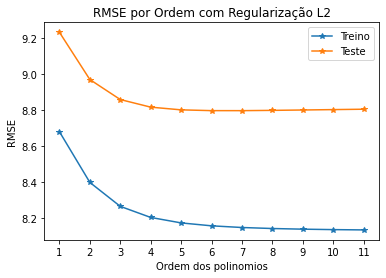

In [28]:
rmse_treino = []
mre_treino = []
rmse_teste = []
mre_teste = []

for i in range(1,12):
    polinomial = RegressaoPolinomial(t = 2000, taxa = 0.1, lamb=0.25 ,ordem = i)
    polinomial.fit(X_treino_01, y_treino_01)

    y_pred_teste_01 = polinomial.predict(X_teste_01)
    y_pred_treino_01 = polinomial.predict(X_treino_01)

    y_pred_teste = escalador_y_01.inversa(y_pred_teste_01)
    y_pred_treino = escalador_y_01.inversa(y_pred_treino_01)
    
    rmse_treino.append(np.sqrt(MSE(y_pred_treino, y_treino)))
    mre_treino.append(MRE(y_pred_treino, y_treino))
    
    rmse_teste.append(np.sqrt(MSE(y_pred_teste, y_teste)))
    mre_teste.append(MRE(y_pred_teste, y_teste))   


plt.plot(rmse_treino,label='Treino', marker = '*')
plt.plot(rmse_teste,label='Teste', marker = '*')
plt.xlabel('Ordem dos polinomios')
plt.ylabel('RMSE')
ticks = np.arange(0,11)
labels = np.arange(1,12)
plt.xticks(ticks,labels)
plt.title("RMSE por Ordem com Regularização L2")
plt.legend()
plt.show()